In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ticker = yf.Ticker("INFY")
data=ticker.history(start="2022-01-01",end="2024-12-31",interval="1d")
data = data.dropna()
data=data.drop(['Dividends','Stock Splits'],axis=1)

print(data.head(30))

                                Open       High        Low      Close  \
Date                                                                    
2022-01-03 00:00:00-05:00  23.443216  23.581717  23.221619  23.323185   
2022-01-04 00:00:00-05:00  23.313952  23.424751  23.064653  23.184687   
2022-01-05 00:00:00-05:00  22.935389  23.009255  22.390627  22.436792   
2022-01-06 00:00:00-05:00  22.344461  22.612225  22.132095  22.261362   
2022-01-07 00:00:00-05:00  22.362925  22.501425  22.132094  22.344460   
2022-01-10 00:00:00-05:00  22.769188  22.879988  22.556824  22.870754   
2022-01-11 00:00:00-05:00  22.972319  23.138517  22.769188  23.101585   
2022-01-12 00:00:00-05:00  24.144943  24.366541  23.554016  23.775614   
2022-01-13 00:00:00-05:00  23.766378  23.803312  23.517080  23.637114   
2022-01-14 00:00:00-05:00  23.747915  24.274212  23.618650  24.191113   
2022-01-18 00:00:00-05:00  23.738680  23.794081  23.470917  23.554016   
2022-01-19 00:00:00-05:00  23.064650  23.129282  22

count_buy_bollinger:  41
count_sell_bollinger:  632


,Open,High,Low,Close,Volume,MovingA,SMA,Upper,Lower,Buy_bollinger,Sell_bollinger
Date,,,,,,,,,,,
2022-04-26 00:00:00-04:00,18.697329,18.817360,18.521896,18.577297,13027100,19.902926,1.333976,22.570877,17.234975,0,0
2022-04-27 00:00:00-04:00,18.457264,18.761961,18.457264,18.577297,9754100,19.649012,1.218851,22.086713,17.211311,0,0
2022-04-28 00:00:00-04:00,18.845058,19.075890,18.789659,18.928158,24229100,19.430052,1.040251,21.510553,17.349551,0,0
2022-04-29 00:00:00-04:00,18.688093,18.743492,18.346464,18.346464,12325100,19.177456,0.820045,20.817546,17.537367,0,0
2022-05-02 00:00:00-04:00,18.355699,18.669630,18.318767,18.604998,15073900,18.986197,0.585445,20.157086,17.815307,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,3622600,23.050714,0.296225,23.643165,22.458264,0,0
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,2051600,23.068571,0.270076,23.608723,22.528420,0,0
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,3440300,23.052857,0.287587,23.628031,22.477684,0,0


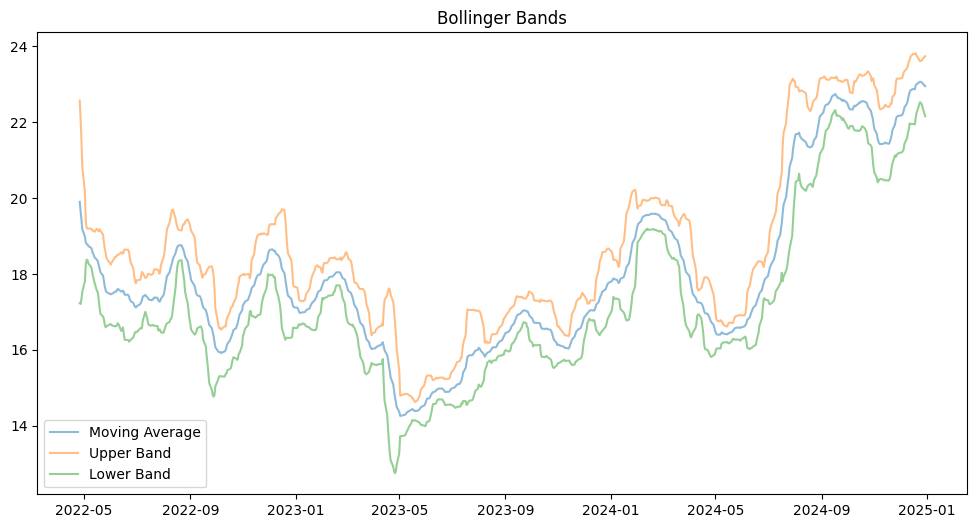

In [10]:
#Bollinger Bands-> 2 Standard deviations used and 14 day moving average used
def bollinger_bands(data):




    data['MovingA'] = data['Close'].rolling(window=14).mean()
    data['SMA'] = data['Close'].rolling(window=14).std(ddof=0)
    data['Upper'] = data['MovingA'] + (data['SMA'] * 2)
    data['Lower'] = data['MovingA'] - (data['SMA'] * 2)

    count_buy_bollinger=0
    count_sell_bollinger=0

    data.dropna(inplace=True)

    data['Buy_bollinger'] = np.where(data['Close'] > data['Upper'], 1, 0)
    data['Sell_bollinger'] = np.where(data['Close'] < data['Lower'], -1, 0)

    for i in range(1, len(data)):
        if data['Buy_bollinger'].iloc[i] == 1:
          count_buy_bollinger+=1
        else:
         count_sell_bollinger+=1





    plt.figure(figsize=(12,6))

    plt.plot(data['MovingA'],label='Moving Average',alpha=0.5)
    plt.plot(data['Upper'],label='Upper Band',alpha=0.5)
    plt.plot(data['Lower'],label='Lower Band',alpha=0.5)
    plt.legend()
    plt.title('Bollinger Bands')

    print("count_buy_bollinger: ",count_buy_bollinger)
    print("count_sell_bollinger: ",count_sell_bollinger)

    return data






bollinger_bands(data)




In [11]:
#RSI Calculated for a time period of 14 days
def relative_strength_index(data):

    data['Change'] = data['Close'].diff()
    gain = data['Change'].where(data['Change'] > 0, 0)
    loss = -data['Change'].where(data['Change'] < 0, 0)
    gainavg = gain.ewm(alpha=1/14,min_periods=14).mean()
    lossavg = loss.ewm(alpha=1/14,min_periods=14).mean()
    rs = gainavg / lossavg
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    data.dropna(inplace=True)
    count_buy_rsi=0
    count_sell_rsi=0


    data['Buy_RSI']=np.where(data['RSI']<30,1,0)
    data['Sell_RSI']=np.where(data['RSI']>70,-1,0)

    for i in range(1, len(data)):
        if data['Buy_RSI'].iloc[i] == 1:
          count_buy_rsi+=1
        else:
         count_sell_rsi+=1

    print("count_buy_rsi: ",count_buy_rsi)
    print("count_sell_rsi: ",count_sell_rsi)


    return data









relative_strength_index(data)


count_buy_rsi:  38
count_sell_rsi:  622


,Open,High,Low,Close,Volume,MovingA,SMA,Upper,Lower,Buy_bollinger,Sell_bollinger,Change,RSI,Buy_RSI,Sell_RSI
Date,,,,,,,,,,,,,,,
2022-05-13 00:00:00-04:00,17.820168,18.014067,17.718603,17.958668,14033500,18.448030,0.332287,19.112604,17.783456,0,0,-0.073866,35.480856,0,0
2022-05-16 00:00:00-04:00,17.663201,17.709368,17.450836,17.487770,11057600,18.370206,0.411131,19.192469,17.547944,0,-1,-0.470898,27.703547,1,0
2022-05-17 00:00:00-04:00,17.930967,18.115633,17.912500,18.106400,7184600,18.336571,0.412074,19.160719,17.512422,0,0,0.618629,44.816748,0,0
2022-05-18 00:00:00-04:00,17.838635,17.903267,17.321573,17.340040,10672000,18.223134,0.450414,19.123962,17.322306,0,0,-0.766359,34.060669,0,0
2022-05-19 00:00:00-04:00,16.952244,17.386206,16.822977,17.201540,9392800,18.141354,0.519274,19.179901,17.102806,0,0,-0.138500,32.540672,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,3622600,23.050714,0.296225,23.643165,22.458264,0,0,0.050001,50.977659,0,0
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,2051600,23.068571,0.270076,23.608723,22.528420,0,0,-0.010000,50.836407,0,0
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,3440300,23.052857,0.287587,23.628031,22.477684,0,0,-0.130001,48.938028,0,0


In [13]:
#Both ADX And ATR calculated for a time period of 20 days
def Average_Directional_Index(data):
    ####ATR

    data['High-Low'] = data['High'] - data['Low']
    data['High-PC'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['High-Low', 'High-PC', 'Low-PC']].max(axis=1,skipna=False)
    data['ATR'] = data['TR'].ewm(com=20,min_periods=20).mean()

    ####ATR

    data['+DM'] = np.where((data['High'] - data['High'].shift(1)) > (data['Low'].shift(1) - data['Low']),
                       data['High'] - data['High'].shift(1), 0)
    data['+DM'] = np.where(data['+DM'] < 0, 0, data['+DM'])

    data['-DM'] = np.where((data['Low'].shift(1) - data['Low']) > (data['High'] - data['High'].shift(1)),
                       data['Low'].shift(1) - data['Low'], 0)
    data['-DM'] = np.where(data['-DM'] < 0, 0, data['-DM'])


    data['+DI'] = 100 * (data['+DM'].ewm(alpha=1/20,min_periods=20).mean()/ data['ATR'])
    data['-DI'] = 100 * (data['-DM'].ewm(alpha=1/20,min_periods=20).mean()/ data['ATR'])

    data['DX'] = 100 * (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI']))
    data['ADX'] = data['DX'].ewm(span=20,min_periods=20).mean()
    data.dropna(inplace=True)

    count_buy_atr=0
    count_sell_atr=0

    data['Buy_ATR']=np.where((data['Close'] > (data['High'].shift(1) + 1.5 * data['ATR'])).astype(int),1,0)
    data['Sell_ATR']=np.where((data['Close'] < (data['Low'].shift(1) - 1.5 * data['ATR'])).astype(int),-1,0)

    for i in range(1, len(data)):
        if data['Buy_ATR'].iloc[i] == 1:
          count_buy_atr+=1
        else:
         count_sell_atr+=1

    print("count_buy_atr: ",count_buy_atr)
    print("count_sell_atr: ",count_sell_atr)

    return data






Average_Directional_Index(data)

count_buy_atr:  10
count_sell_atr:  572


,Open,High,Low,Close,Volume,MovingA,SMA,Upper,Lower,Buy_bollinger,...,TR,ATR,+DM,-DM,+DI,-DI,DX,ADX,Buy_ATR,Sell_ATR
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-06 00:00:00-04:00,16.936302,17.010993,16.740237,16.786919,7158700,17.691887,0.643503,18.978894,16.404880,0,...,0.270756,0.307596,0.000000,0.065355,21.461560,36.385751,25.799282,20.087116,0,0
2022-09-07 00:00:00-04:00,16.936302,17.225733,16.908294,17.207060,4769300,17.581184,0.581044,18.743271,16.419096,0,...,0.438815,0.314879,0.214740,0.000000,23.655205,33.519812,17.253353,19.779648,0,0
2022-09-08 00:00:00-04:00,17.132368,17.300425,17.067014,17.300425,3936900,17.485152,0.503194,18.491539,16.478765,0,...,0.233411,0.310393,0.074691,0.000000,24.000868,32.081020,14.407776,19.204421,0,0
2022-09-09 00:00:00-04:00,17.524496,17.832598,17.505823,17.795252,5513600,17.437135,0.434558,18.306251,16.568020,0,...,0.532174,0.322516,0.532174,0.000000,31.072727,29.140226,3.209445,17.511706,1,0
2022-09-12 00:00:00-04:00,17.953975,18.122032,17.916631,17.963312,3607400,17.418462,0.404920,18.228302,16.608623,0,...,0.326780,0.322747,0.289433,0.000000,34.324533,27.493143,11.050867,16.835134,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,3622600,23.050714,0.296225,23.643165,22.458264,0,...,0.330000,0.451566,0.000000,0.000000,25.235197,26.252182,1.975212,13.149470,0,0
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,2051600,23.068571,0.270076,23.608723,22.528420,0,...,0.270000,0.442920,0.000000,0.000000,24.441408,25.426403,1.975212,12.085255,0,0
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,3440300,23.052857,0.287587,23.628031,22.477684,0,...,0.170000,0.429924,0.000000,0.000000,23.921236,24.885268,1.975212,11.122393,0,0


In [14]:
#Calculations of stochastic oscillator is done for time period of 14 days
def stochastic_oscillator(data):
    data['%K'] = (data['Close'] - data['Low'].rolling(window=14).min()) / (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
    data['%SO'] = data['%K'].rolling(window=3).mean()

    count_buy_so=0
    count_sell_so=0

    data['Buy_SO']=np.where(data['%SO']<20,1,0)
    data['Sell_SO']=np.where(data['%SO']>80,-1,0)

    for i in range(1, len(data)):
        if data['Buy_SO'].iloc[i] == 1:
          count_buy_so+=1
        else:
         count_sell_so+=1
    print("count_buy_so: ",count_buy_so)
    print("count_sell_so: ",count_sell_so)


    return data



stochastic_oscillator(data)


count_buy_so:  88
count_sell_so:  494


,Open,High,Low,Close,Volume,MovingA,SMA,Upper,Lower,Buy_bollinger,...,+DI,-DI,DX,ADX,Buy_ATR,Sell_ATR,%K,%SO,Buy_SO,Sell_SO
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-06 00:00:00-04:00,16.936302,17.010993,16.740237,16.786919,7158700,17.691887,0.643503,18.978894,16.404880,0,...,21.461560,36.385751,25.799282,20.087116,0,0,NaN,NaN,0,0
2022-09-07 00:00:00-04:00,16.936302,17.225733,16.908294,17.207060,4769300,17.581184,0.581044,18.743271,16.419096,0,...,23.655205,33.519812,17.253353,19.779648,0,0,NaN,NaN,0,0
2022-09-08 00:00:00-04:00,17.132368,17.300425,17.067014,17.300425,3936900,17.485152,0.503194,18.491539,16.478765,0,...,24.000868,32.081020,14.407776,19.204421,0,0,NaN,NaN,0,0
2022-09-09 00:00:00-04:00,17.524496,17.832598,17.505823,17.795252,5513600,17.437135,0.434558,18.306251,16.568020,0,...,31.072727,29.140226,3.209445,17.511706,1,0,NaN,NaN,0,0
2022-09-12 00:00:00-04:00,17.953975,18.122032,17.916631,17.963312,3607400,17.418462,0.404920,18.228302,16.608623,0,...,34.324533,27.493143,11.050867,16.835134,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,3622600,23.050714,0.296225,23.643165,22.458264,0,...,25.235197,26.252182,1.975212,13.149470,0,0,37.500053,56.095703,0,0
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,2051600,23.068571,0.270076,23.608723,22.528420,0,...,24.441408,25.426403,1.975212,12.085255,0,0,27.731118,36.327047,0,0
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,3440300,23.052857,0.287587,23.628031,22.477684,0,...,23.921236,24.885268,1.975212,11.122393,0,0,16.806646,27.345939,0,0


In [15]:
#Fast EMA->12 days
#Slow EMA->26 days
#Signal Line->9 days

def MACD(data):
    data['Fast'] = data['Close'].ewm(span=12, min_periods=12).mean()
    data['Slow'] = data['Close'].ewm(span=26, min_periods=26).mean()
    data['MACD'] = data['Fast'] - data['Slow']
    data['Signal'] = data['MACD'].ewm(span=9, min_periods=9).mean()

    data.dropna(inplace=True)

    count_buy_macd=0
    count_sell_macd=0

    data['Buy_MACD']=np.where((data['MACD']>data['Signal'])& (data['MACD'].shift(1) < data['Signal'].shift(1)),1,0)
    data['Sell_MACD']=np.where((data['MACD']<data['Signal'])& (data['MACD'].shift(1) > data['Signal'].shift(1)),-1,0)

    for i in range(1, len(data)):
        if data['Buy_MACD'].iloc[i] == 1:
          count_buy_macd+=1
        else:
         count_sell_macd+=1
    print("count_buy_macd: ",count_buy_macd)
    print("count_sell_macd: ",count_sell_macd)














    return data
MACD(data)





count_buy_macd:  20
count_sell_macd:  529


,Open,High,Low,Close,Volume,MovingA,SMA,Upper,Lower,Buy_bollinger,...,%K,%SO,Buy_SO,Sell_SO,Fast,Slow,MACD,Signal,Buy_MACD,Sell_MACD
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-21 00:00:00-04:00,16.740238,17.141706,16.674884,17.085686,7393300,16.524165,0.358327,17.240820,15.807510,0,...,94.557908,75.963790,0,0,16.610920,16.467040,0.143880,0.082588,0,0
2022-10-24 00:00:00-04:00,17.076350,17.309761,17.010994,17.216396,9595200,16.573515,0.400238,17.373991,15.773039,0,...,93.865011,85.670912,0,-1,16.704340,16.526574,0.177766,0.103913,0,0
2022-10-25 00:00:00-04:00,17.272415,17.440471,17.253741,17.384453,5701200,16.638870,0.449576,17.538023,15.739717,0,...,96.610201,95.011040,0,-1,16.809229,16.594366,0.214863,0.128188,0,0
2022-10-26 00:00:00-04:00,17.365776,17.627196,17.319093,17.440468,7555000,16.718896,0.484101,17.687098,15.750695,0,...,89.847756,93.440990,0,-1,16.906544,16.660898,0.245646,0.153413,0,0
2022-10-27 00:00:00-04:00,17.441412,17.582981,17.375346,17.469727,7597000,16.829022,0.466701,17.762424,15.895621,0,...,91.438531,92.632163,0,-1,16.993339,16.724211,0.269128,0.177903,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,3622600,23.050714,0.296225,23.643165,22.458264,0,...,37.500053,56.095703,0,0,22.952167,22.724218,0.227949,0.280981,0,0
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,2051600,23.068571,0.270076,23.608723,22.528420,0,...,27.731118,36.327047,0,0,22.924142,22.727610,0.196532,0.264091,0,0
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,3440300,23.052857,0.287587,23.628031,22.477684,0,...,16.806646,27.345939,0,0,22.880428,22.721120,0.159308,0.243135,0,0


In [19]:
def vwap(data):
  data['Typical Price']=(data['High']+data['Low']+data['Close'])/3
  data['TPV']=data['Typical Price']*data['Volume']
  data['TPV_Sum']=data['TPV'].cumsum()
  data['Volume_Sum']=data['Volume'].cumsum()
  data['VWAP']=data['TPV_Sum']/data['Volume_Sum']

  data.dropna(inplace=True)
  count_buy_vwap=0
  count_sell_vwap=0

  data['Buy_VWAP']=np.where((data['Close']>data['VWAP'])&((data['Close'].shift(1) < data['VWAP'].shift(1))),1,0)
  data['Sell_VWAP']=np.where((data['Close']<data['VWAP'])&(data['Close'].shift(1)>data['VWAP'].shift(1)),-1,0)

  for i in range(1, len(data)):
        if data['Buy_VWAP'].iloc[i] == 1:
          count_buy_vwap+=1
        else:
         count_sell_vwap+=1
  print("count_buy_vwap: ",count_buy_vwap)
  print("count_sell_vwap: ",count_sell_vwap)
  return data

vwap(data)


count_buy_vwap:  16
count_sell_vwap:  533


,Open,High,Low,Close,Volume,MovingA,SMA,Upper,Lower,Buy_bollinger,...,Signal,Buy_MACD,Sell_MACD,Typical Price,TPV,TPV_Sum,Volume_Sum,VWAP,Buy_VWAP,Sell_VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-21 00:00:00-04:00,16.740238,17.141706,16.674884,17.085686,7393300,16.524165,0.358327,17.240820,15.807510,0,...,0.082588,0,0,16.967425,1.254453e+08,1.254453e+08,7393300,16.967425,0,0
2022-10-24 00:00:00-04:00,17.076350,17.309761,17.010994,17.216396,9595200,16.573515,0.400238,17.373991,15.773039,0,...,0.103913,0,0,17.179050,1.648364e+08,2.902817e+08,16988500,17.086952,0,0
2022-10-25 00:00:00-04:00,17.272415,17.440471,17.253741,17.384453,5701200,16.638870,0.449576,17.538023,15.739717,0,...,0.128188,0,0,17.359555,9.897030e+07,3.892520e+08,22689700,17.155449,0,0
2022-10-26 00:00:00-04:00,17.365776,17.627196,17.319093,17.440468,7555000,16.718896,0.484101,17.687098,15.750695,0,...,0.153413,0,0,17.462252,1.319273e+08,5.211793e+08,30244700,17.232087,0,0
2022-10-27 00:00:00-04:00,17.441412,17.582981,17.375346,17.469727,7597000,16.829022,0.466701,17.762424,15.895621,0,...,0.177903,0,0,17.476018,1.327653e+08,6.539446e+08,37841700,17.281058,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,3622600,23.050714,0.296225,23.643165,22.458264,0,...,0.280981,0,0,22.710000,8.226925e+07,8.485124e+10,4751308800,17.858498,0,0
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,2051600,23.068571,0.270076,23.608723,22.528420,0,...,0.264091,0,0,22.713333,4.659867e+07,8.489784e+10,4753360400,17.860593,0,0
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,3440300,23.052857,0.287587,23.628031,22.477684,0,...,0.243135,0,0,22.666667,7.798013e+07,8.497582e+10,4756800700,17.864069,0,0
